In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [74]:
df = pd.read_csv("imdb_top_1000.csv")

In [75]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


##### Описание данных

- **Poster_Link** - Ссылка на постер фильма.
- **Series_Title** - Название фильма.
- **Released_Year** - Год выпуска фильма.
- **Certificate** - Возрастное ограничение фильма.
- **Runtime** - Длина фильма.
- **Genre** - Жанр фильма.
- **IMDB_Rating** - Рейтинг фильма на IMDB.
- **Overview** - Краткое содержание фильма.
- **Meta_score** - Оценка фильма из 100.
- **Director** - Имя директора фильма.
- **Star1,Star2,Star3,Star4** - Имя звёзд фильма.
- **No_of_votes** - Количество голосов фильма.
- **Gross** - Сборы фильма.


In [77]:
df.shape

(1000, 16)

Размерность набора данных: 16 признаков и 1000 наблюдений.

В наборе данных есть пропущенные значения.

In [78]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [79]:
df.describe(include="object").T

,count,unique,top,freq
Poster_Link,1000,1000,https://m.media-amazon.com/images/M/MV5BMTY5OD...,1
Series_Title,1000,999,Drishyam,2
Released_Year,1000,100,2014,32
Certificate,899,16,U,234
Runtime,1000,140,100 min,23
Genre,1000,202,Drama,85
Overview,1000,1000,A man in London tries to help a counter-espion...,1
Director,1000,548,Alfred Hitchcock,14
Star1,1000,660,Tom Hanks,12
Star2,1000,841,Emma Watson,7


### Вывод

В Certificate, Meta_score и Gross присутствуют пропущенные значения

In [80]:
df.duplicated().sum()

np.int64(0)

##### Дубликаты отсутствуют

In [81]:
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [82]:
df['Certificate'].value_counts()

Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
Unrated       1
TV-MA         1
16            1
U/A           1
Name: count, dtype: int64

In [83]:
df['Meta_score'].value_counts()

Meta_score
76.0    32
90.0    29
84.0    29
73.0    27
85.0    27
        ..
28.0     1
36.0     1
46.0     1
30.0     1
41.0     1
Name: count, Length: 63, dtype: int64

In [84]:
df['Gross'].value_counts()

Gross
4,360,000      5
5,450,000      2
9,600,000      2
25,000,000     2
5,321,508      2
              ..
696,690        1
1,378,435      1
141,843,612    1
13,780,024     1
43,182,776     1
Name: count, Length: 823, dtype: int64

In [85]:
print(df['Meta_score'].mode()[0])
df['Meta_score'] = df['Meta_score'].fillna(value=df['Meta_score'].mode()[0])

76.0


In [86]:
print(df["Gross"].mode()[0])
df['Gross'] = df['Gross'].fillna(value=df['Gross'].mode()[0])

4,360,000


In [88]:
df.isna().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

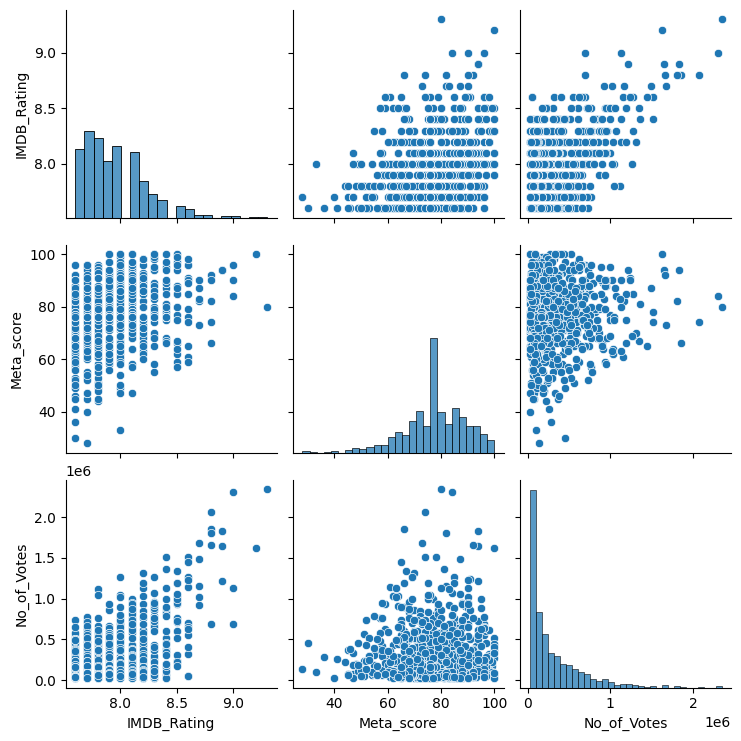

In [89]:
sns.pairplot(df);

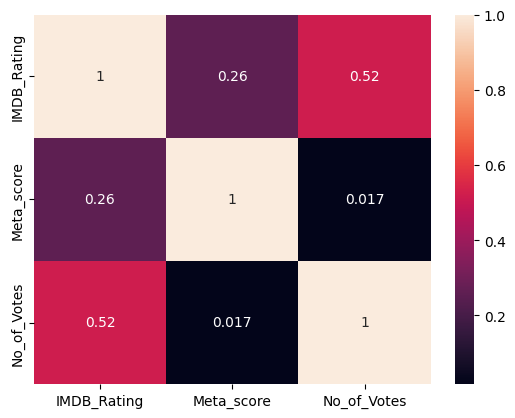

In [90]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

##### Имеется небольшая корреляция между оценкой IMDB и количеством голосов

### Вывод
##### Данный датасет имел пропушенные значения, которые были заполнены. Аномальные значения отсутствуют. Между IMDB_Rating а так же No_of_Votes имеется небольшая корреляция.